In [1]:
library(MASS)

In [4]:
install.packages('ISLR') 

Installing package into 'C:/Users/Diego/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Diego\AppData\Local\Temp\RtmpqqHli2\downloaded_packages


In [2]:
library(ISLR)

### Simple Linear Regression

In [3]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [7]:
#housing values from Boston 
#506 rows
#14 columns

?Boston

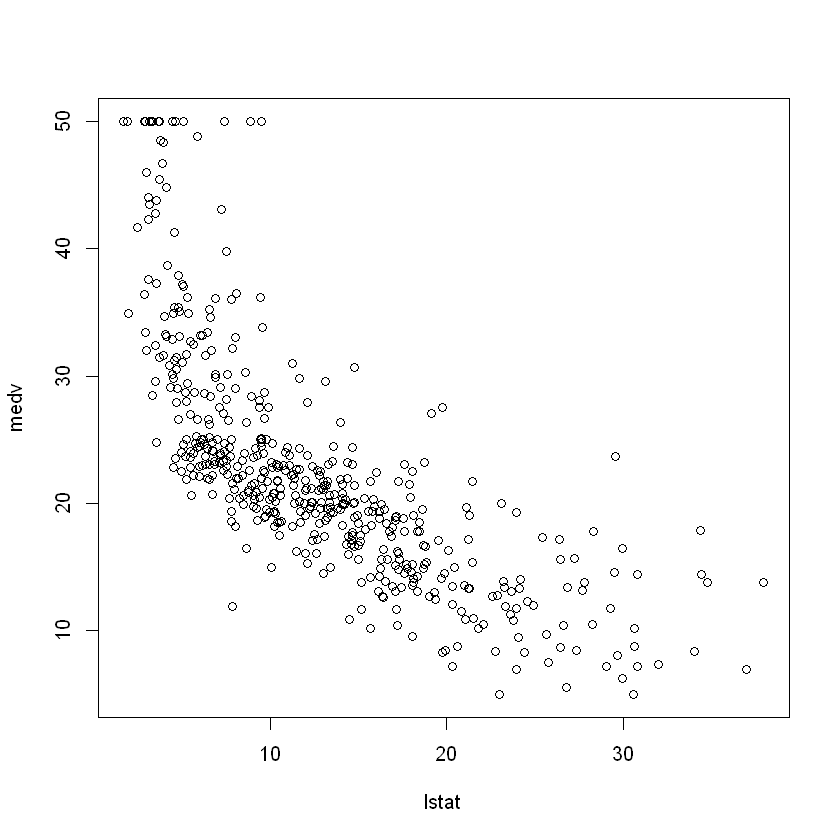

In [55]:
#lstat == lower status of population (percent)
#medv == median value of owner-occupied homes in $100k

#response is medv (~)
#tell it to get it from df Boston

#as lower status in region increases,
#median housing value decreases
plot(medv~lstat, Boston)

In [49]:
#apply a Linear Model
#lstat single predictor in this case (X)
#y == medv (on the left)
fit1 <- lm(medv~lstat, data=Boston)

#gives intercept and coefficient(which is negative)
fit1


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [6]:
#gives you p-values
#very significant (lstat == lower status of population)
#negative coeffiecient
summary(fit1)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


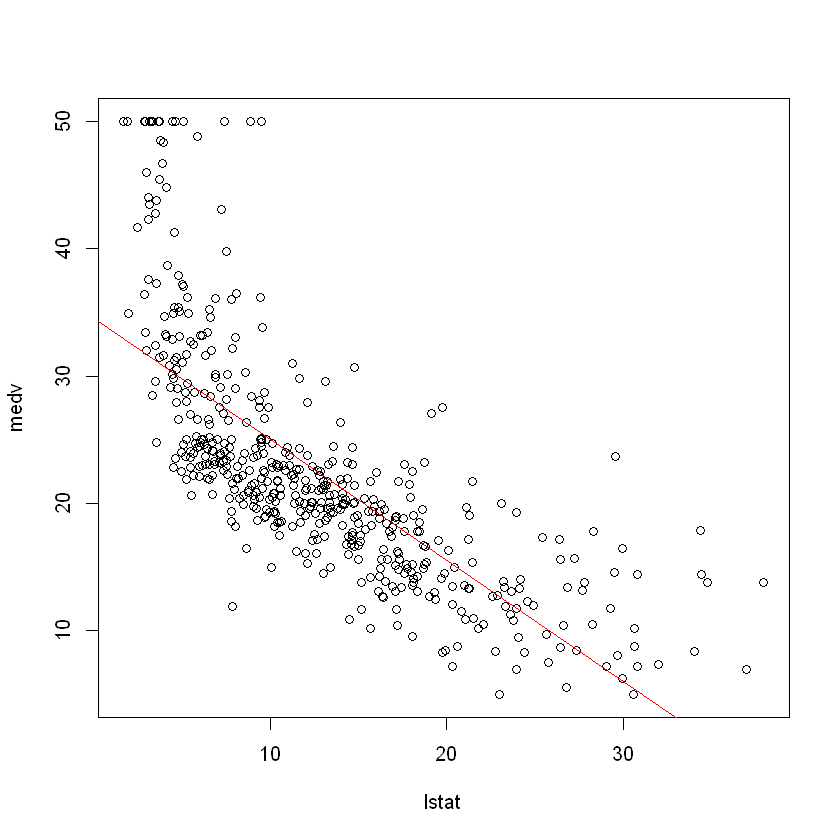

In [56]:
#fit linear model to the plot (red line)

#does not work (try R studio)
#abline(fit1, col="red")
par(mfrow=c(1,1))
plot(medv~lstat, Boston)
abline(fit1, col='red')

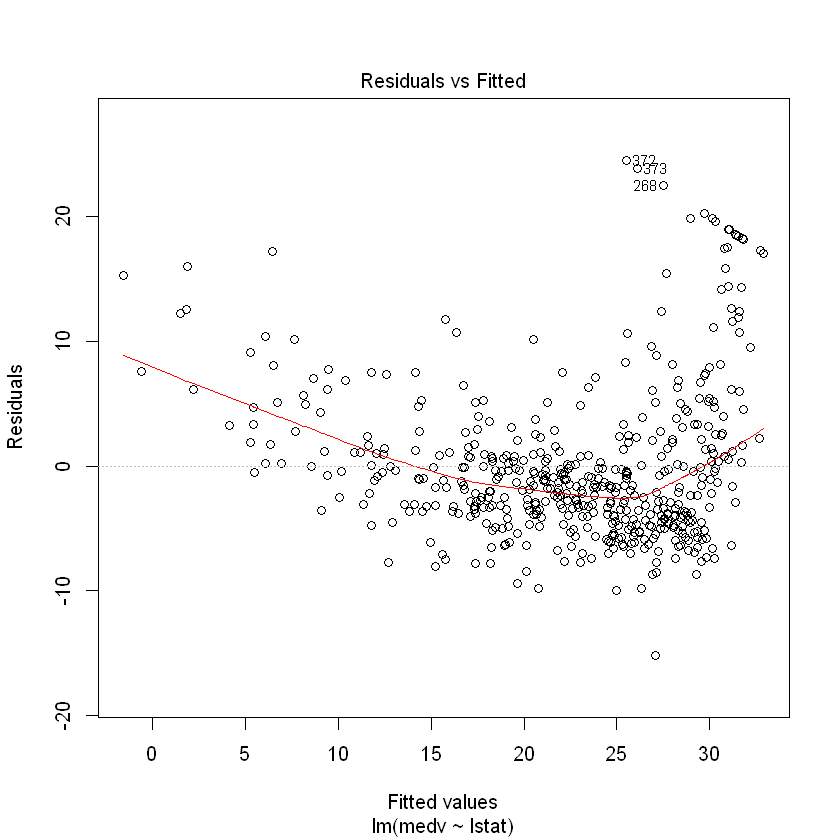

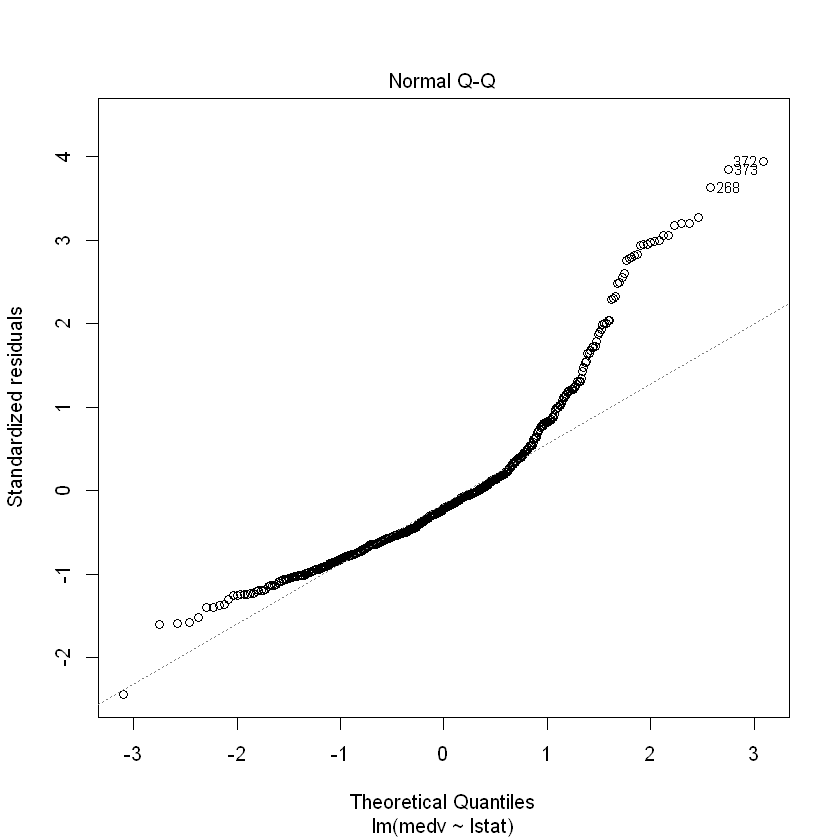

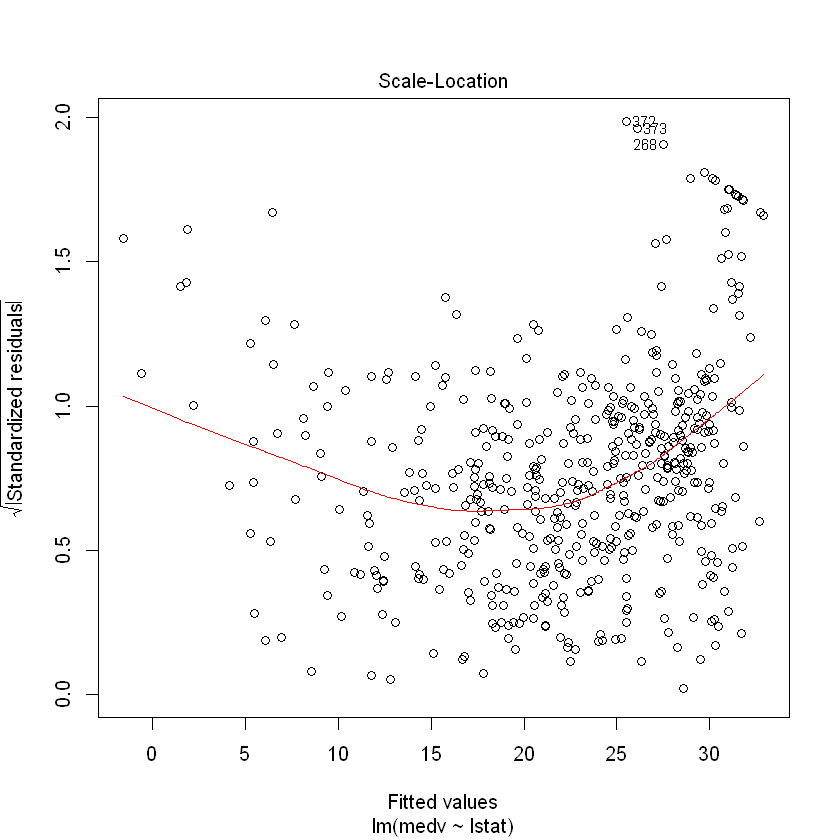

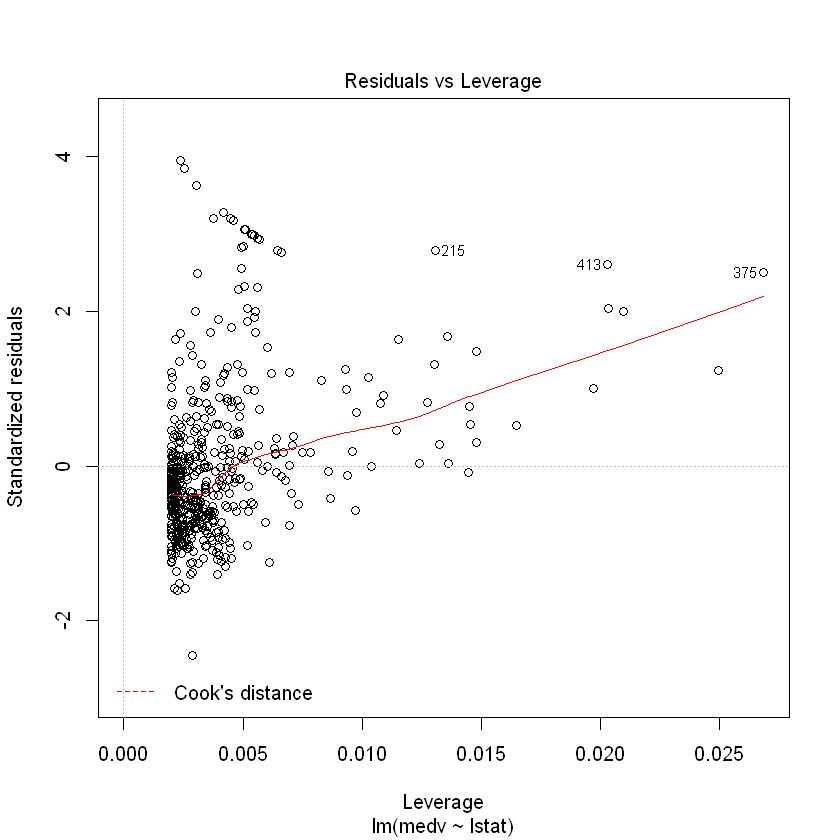

In [38]:
plot(fit1)

In [10]:
names(fit1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [37]:
?abline

In [24]:
#finds confident intervals
confint(fit1)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [25]:
#predict for 3 new values w/ lstat (5,10,15)
#ask for predictions and CIs

#we get 1) fit for those 3 values
#2) lower and 3) upper CIs
predict(fit1, data.frame(lstat= c(5,10,15)), interval = 'confidence')

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


### Multiple Linear Regression

In [27]:
#both predictors significant 
fit2 <- lm(medv~lstat+age, data = Boston)

In [28]:
#R2 == percent of variance explained
summary(fit2)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [29]:
#~. == use all other vars in Boston data set
#except medv (medv == y;response)
fit3<-lm(medv~.,Boston)

In [30]:
#most significant
#age no longer significant 
#age == other vars correlated w/ age 
summary(fit3)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [31]:
#2x2 layout, b/c four plots get produced when plot


#1) fitted values just a vector, so we can plot residuals
#looking for non-linearties (know there is non-l here)

#3) square root of the absolute standardized residuals
#to see if variance is changing w/ fit/mean
#looking at plot, it may, but may be due to non-linearity

par(mfrow=c(2,2))

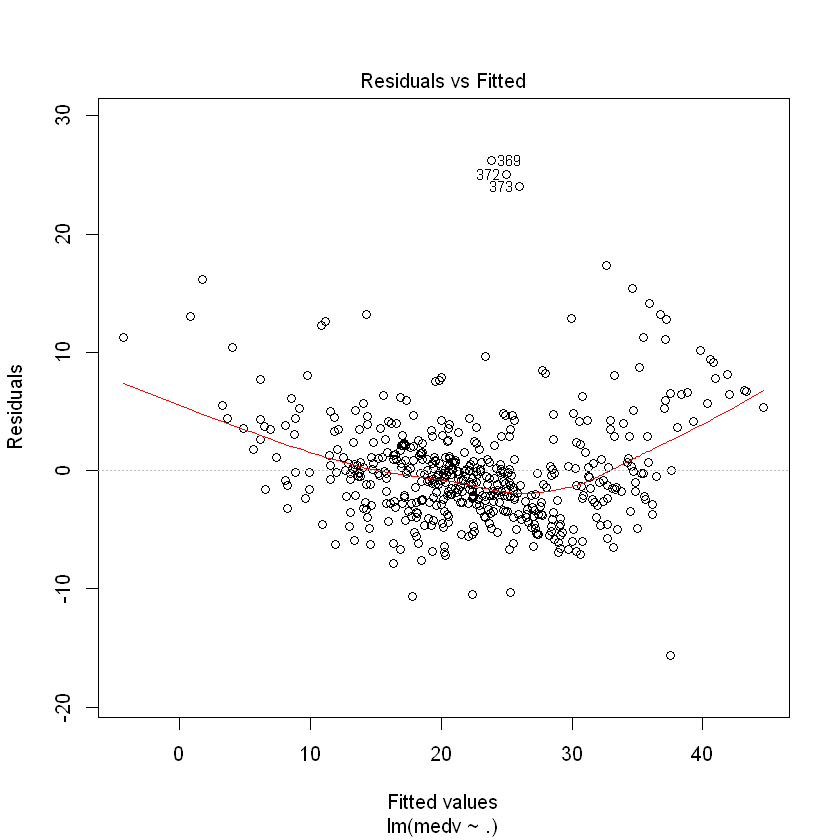

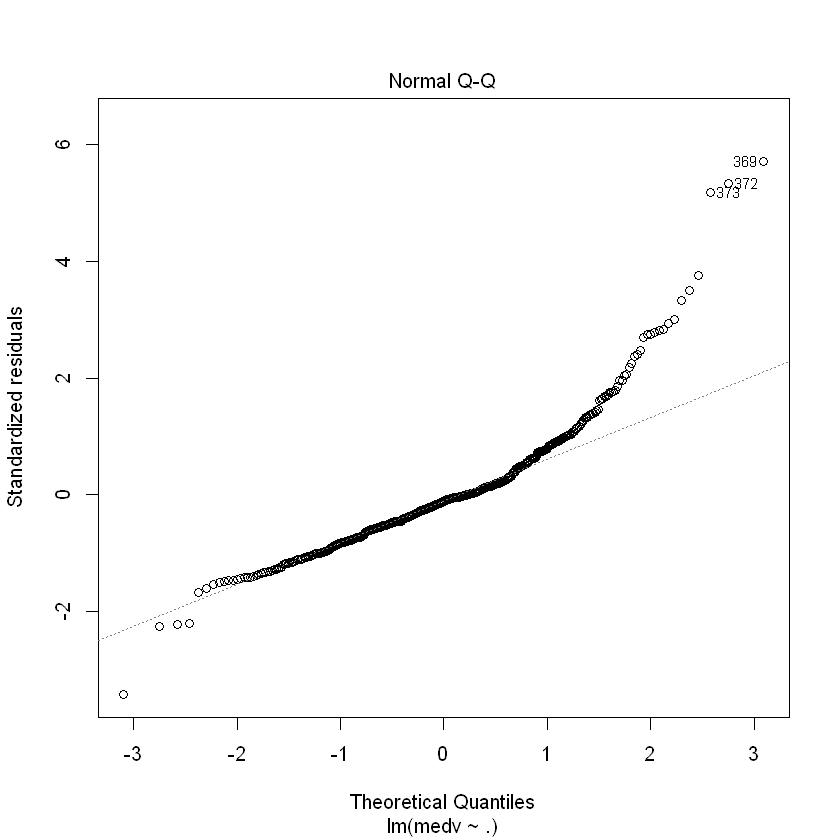

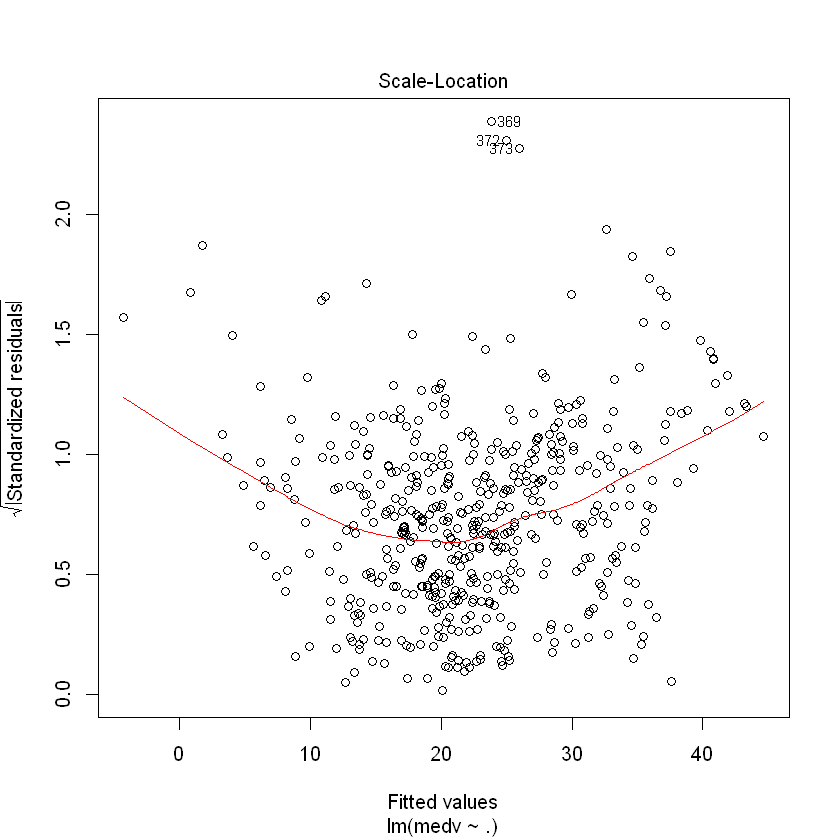

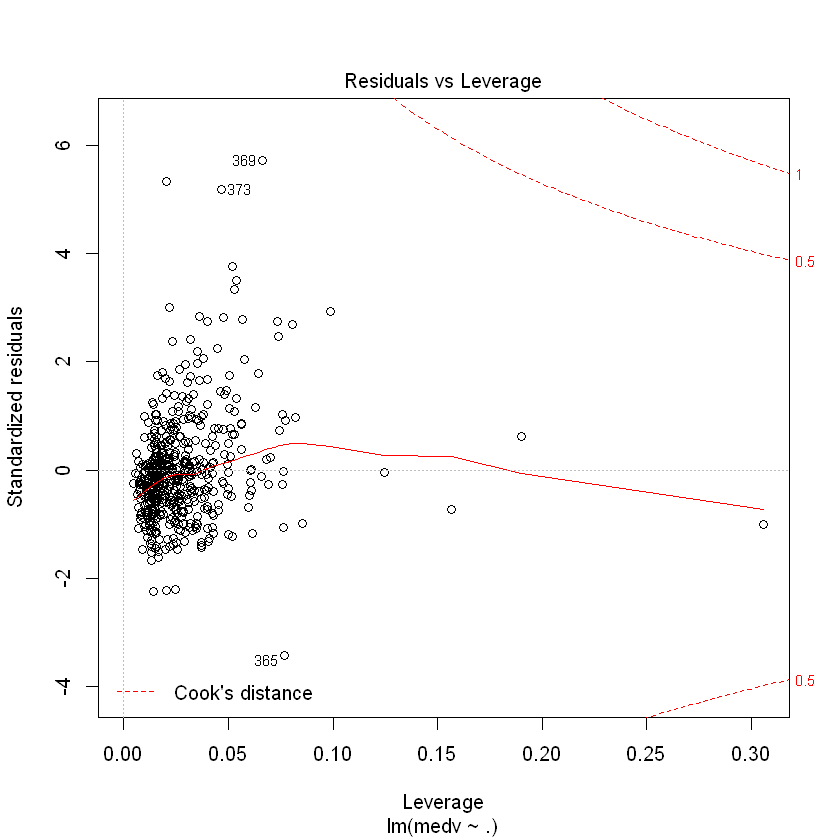

In [32]:
plot(fit3)

In [34]:
#~.-age
#~ empty on left == use same response 
#. == replace fit in fit3
#update formula (vars removed)
#remove age and indus 
fit4=update(fit3,~.-age-indus)

In [35]:
#all vars significant now 
summary(fit4)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*

### Nonlinear terms and interacions 

In [39]:
#interactions
fit5<-lm(medv~lstat*age, Boston)

In [40]:
#interaction is significant 
summary(fit5)


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [41]:
#1)quadratic term == lstat^2
#2) protect it w/ identity function
fit6=lm(medv~lstat +I(lstat^2), Boston)

In [42]:
#both linear and quadratic significant
summary(fit6)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [43]:
#var names in df now in our workspace
attach(Boston)

In [44]:
#single plot layout 
# one by one layout 
par(mfrow=c(1,1))

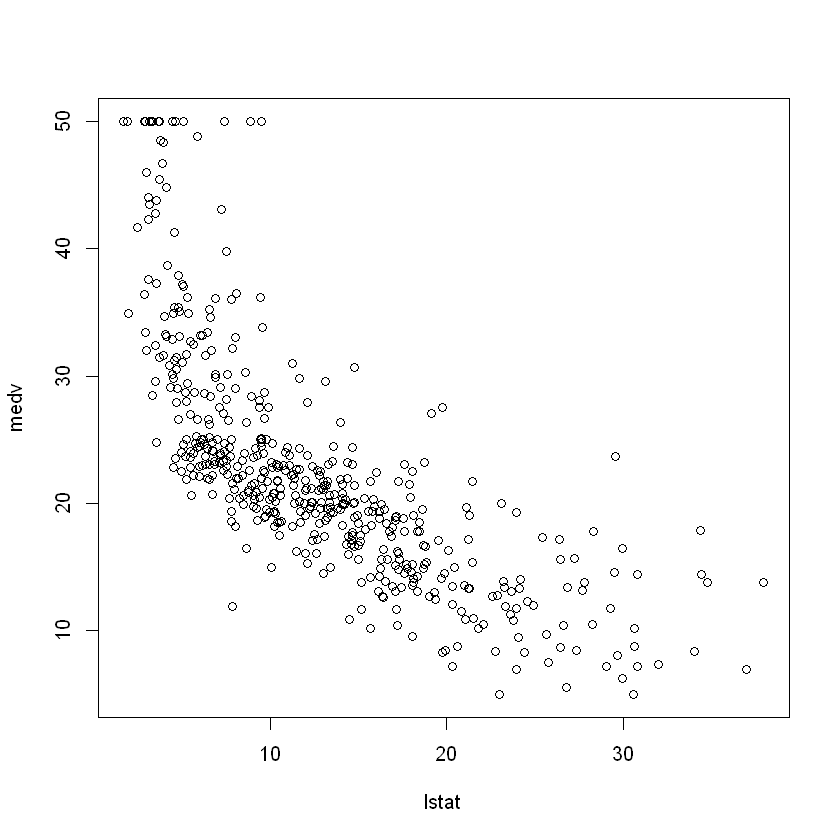

In [45]:
#original 
plot(medv~lstat)

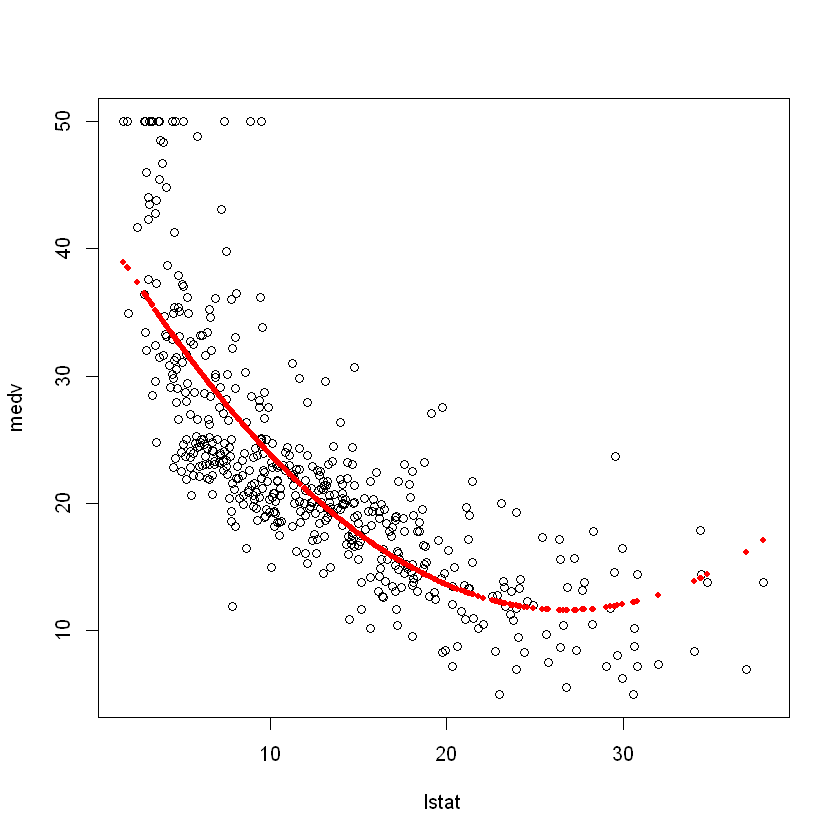

In [62]:
#cannot use ablines anymore (onloy for linear)

#include quadratic fit
#pch == plotting character 
par(mfrow=c(1,1))
plot(medv~lstat)
#quadratic line fitted
points(lstat, fitted(fit6), col="red", pch=20)

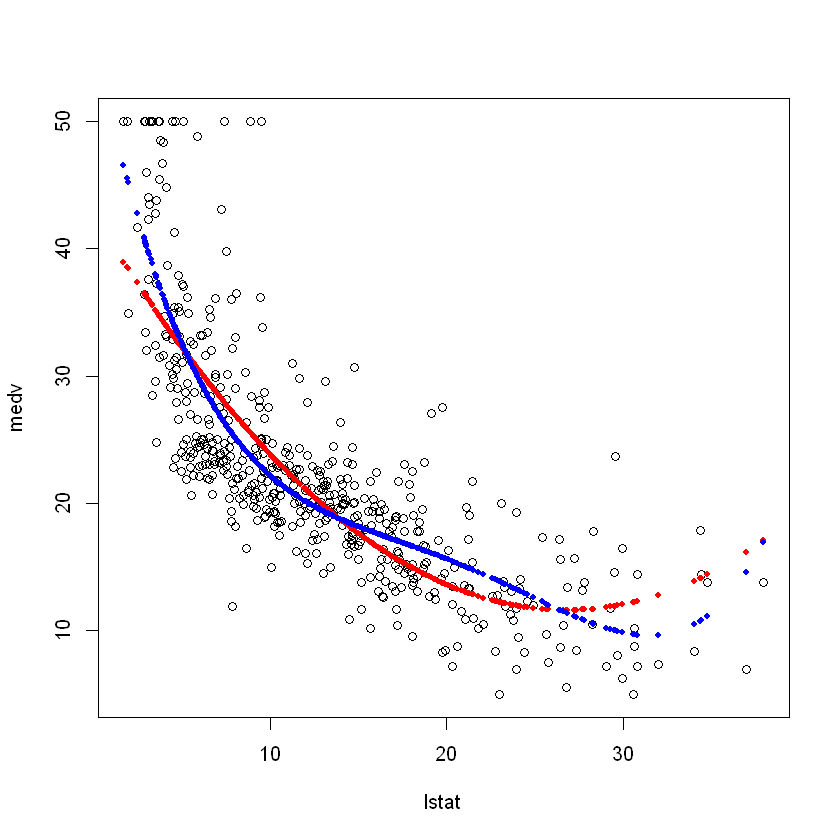

In [68]:
plot(medv~lstat)
#easier way to do polynomials (poly function)
#fit mdev as a poly of degree 4 in lstat
fit7<-lm(medv~poly(lstat,4))

points(lstat, fitted(fit6), col="red", pch=20)
#4 degree poly is too wiggly (overfit data)
points(lstat,fitted(fit7),col='blue',pch=20)

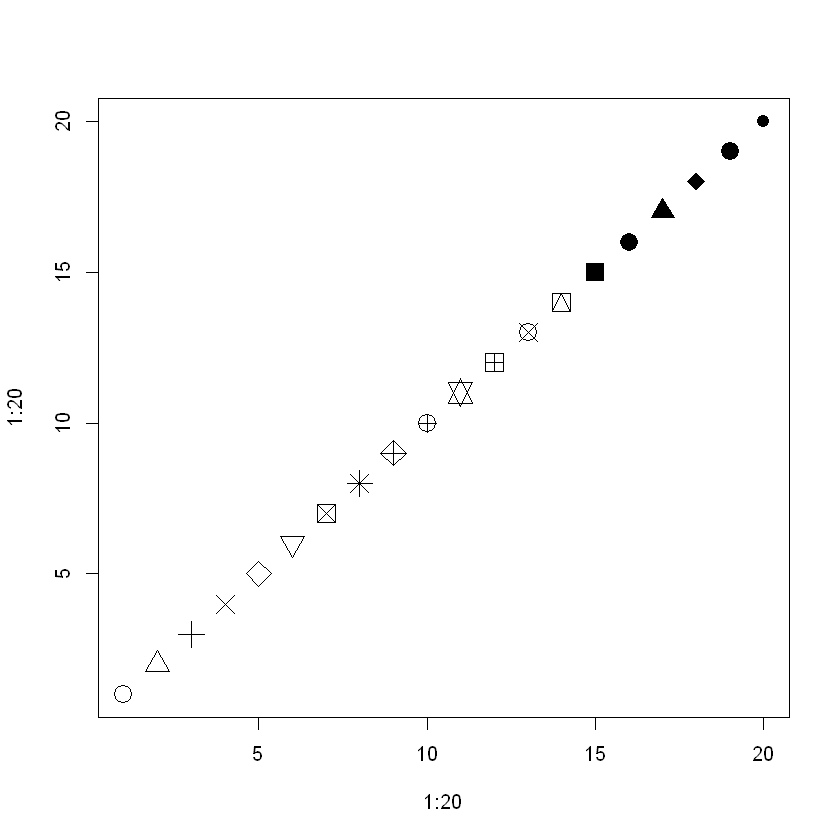

In [3]:
#plotting characters available
#1 to 20 plotting characters 
#cx = 2; == enlarge plotting chars by 2 
plot(1:20,1:20,pch=1:20,cex=2)

### Qualitative Predictors 

In [10]:
#will not work on Jupyter or RSTUDIO
#show carseats df

#will show editor w/data
#close window to run cells below 
fix(Carseats)

In [7]:
#var names (columns)
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [8]:
#descriptive stats for each var

#ShelveLoc  == qualitative var
#gives you Bad, Good, Medium
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

In [15]:
#fir model to carseats data

#~. == everything in the frame except Sales
#interaction1 == income and advertising
#interaction2 == age and price
fit_q <- lm(Sales~. + Income:Advertising + Age:Price, Carseats)

#fit_q <- lm(Sales~. + Income*Advertising + Age*Price, Carseats)

In [16]:

#interaction between Income and Advertising == significant
#interaction between Price and Age == notsignificant

summary(fit_q)


Call:
lm(formula = Sales ~ . + Income:Advertising + Age:Price, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

In [19]:
#show how qualitative var is coded

#2 dummy vars
#3-level factor
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


### Writing R functions

In [21]:
#function to fit a rgerssion model and make a plot

#takes arguments x and y 
regplot <- function(x,y){
    #fit model
    fit <- lm(y~x)
    #plot xy
    plot(x,y)
    #put regression line in plot
    abline(fit, col='red')
}

The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




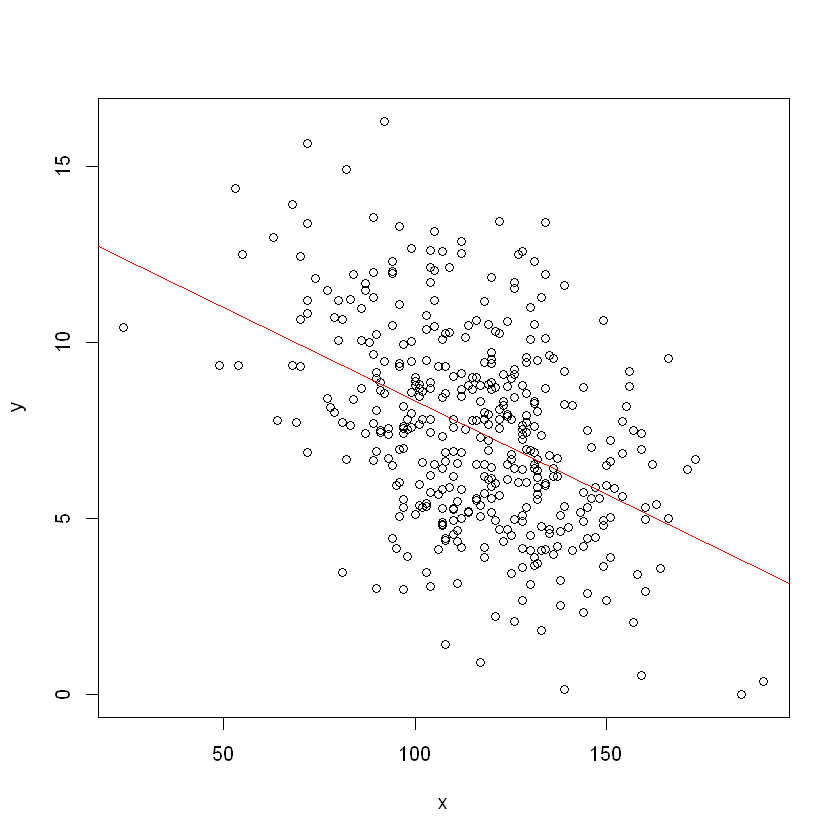

In [23]:
#try out function

attach(Carseats)
regplot(Price, Sales)

In [24]:
#modified function 

#... == can add more arguments
#extra arguments to the plot function 
regplot <- function(x,y,...){
    fit <- lm(y~x)
    plot(x,y,...)
    abline(fit, col='red')
}

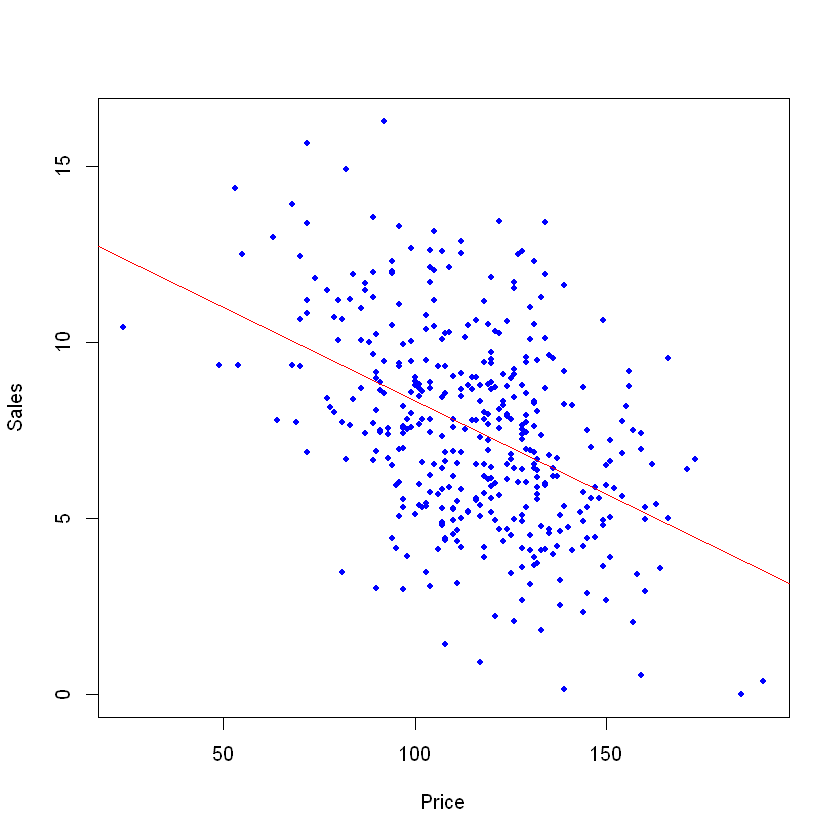

In [25]:
#added extra arguments

regplot(Price, Sales, xlab='Price', ylab='Sales', col='blue',pch=20)

### End

### Extra stuff

In [12]:
lm.fit=lm(medv~lstat,data=Boston)
lm.fit



Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [13]:
summary(lm.fit)



Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [14]:
names(lm.fit)


[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [15]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

In [16]:
#confidence intervals
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [17]:
predict(lm.fit,data.frame(lstat=(c(5,10,15))), interval="confidence")


,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [18]:
predict(lm.fit,data.frame(lstat=(c(5,10,15))), interval="prediction")


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


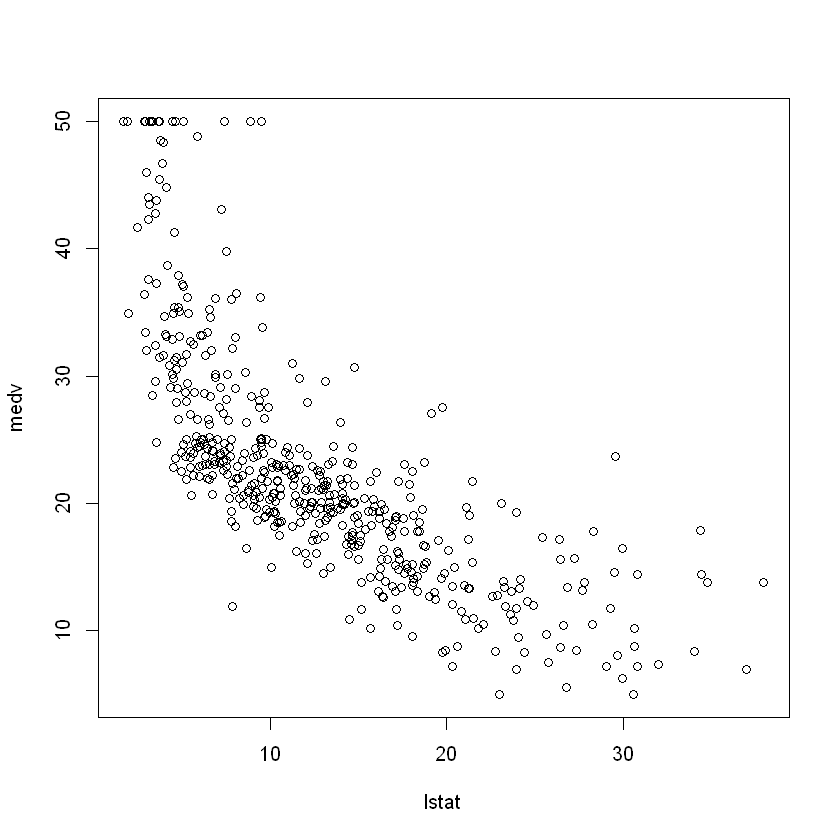

In [20]:
plot(medv~lstat,data=Boston)

In [22]:
abline(lm.fit)

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet
